---
### Задание 1

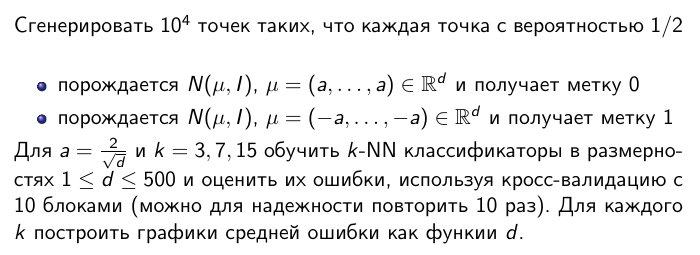

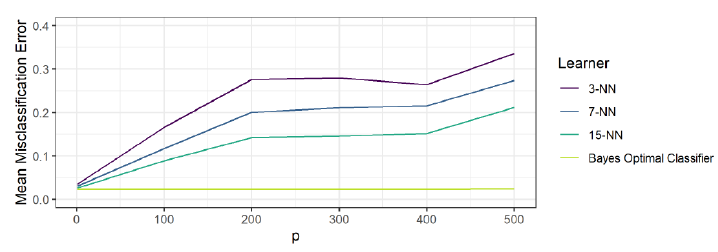

---
### Подключение библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

---
### Пример генерации данных

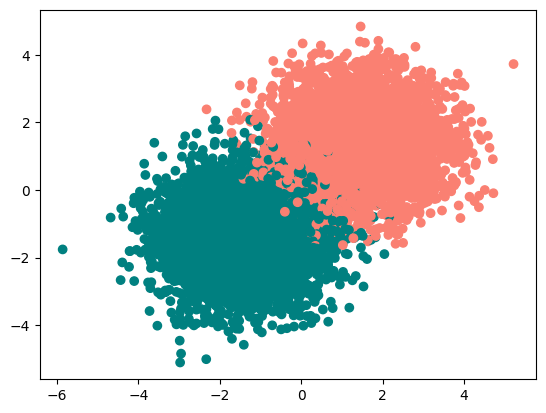

In [2]:
X, y = make_blobs(n_samples=10000, centers=[[2/np.sqrt(2), 2/np.sqrt(2)],[-2/np.sqrt(2), -2/np.sqrt(2)]], n_features=2, cluster_std=1., random_state=0)

# 0=salmon, 1=teal
color_map = ['#FA8072' if x == 0 
             else 
             '#008080'
             for x in y]

plt.scatter(x=X[:,0], y=X[:,1], c=color_map);
plt.show()

---
### Функция для генерации датасетов разных размерностей и проведения перекрёстной проверки

In [3]:
def knn_crossdimensional_cv(k_neighbours:list=[3,7,15], k_folds:int=10, 
                            d_list:list=[2,100,200,300,400,500], d_range:tuple=None) -> dict:
    
    result = {}
    for k in k_neighbours:
        result[k] = np.empty((0,))
        
    for d in d_list:
        mu1 = np.full((d,), 2/np.sqrt(d))
        mu2 = np.full((d,), -2/np.sqrt(d))
        mu = np.vstack([mu1, mu2])
        
        X, y = make_blobs(n_samples=10000, centers=mu, cluster_std=1., n_features=d, random_state=0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # Создание экземпляра классификатора KNeighborsClassifier
        knn = KNeighborsClassifier()
        
        # Определение диапазона значений гиперпараметров для GridSearchCV
        param_grid = {'n_neighbors': [3, 7, 15]}
        
        # Создание объекта GridSearchCV
        grid = GridSearchCV(knn, param_grid, cv=k_folds)
        # Обучение объекта GridSearchCV на обучающих данных
        grid.fit(X_train, y_train)
        
        # Фиксация результата
        results_df = pd.DataFrame(grid.cv_results_)
        for key in result:
            result[key] = np.append(result[key], results_df[results_df['param_n_neighbors'] == key]['mean_test_score'].iloc[0])
        
    return result

In [4]:
kneighbours=[3,7,15]
kfolds=10
dlist=[2,100,200,300,400,500]

In [5]:
res = knn_crossdimensional_cv(k_neighbours=kneighbours, k_folds=kfolds, d_list=dlist)

---
### Визуализация результатов

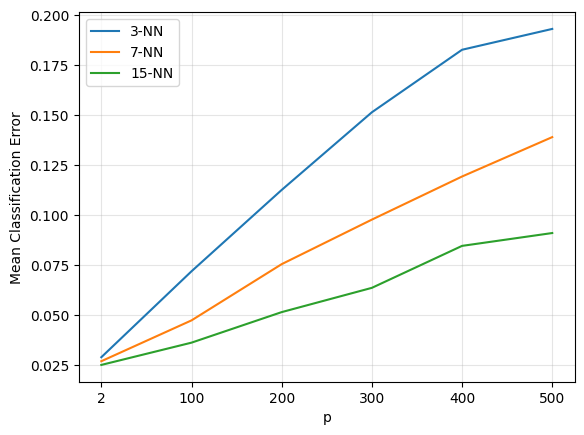

In [6]:
for key in res:
    plt.plot(1. - res[key])

labels = [str(x) for x in dlist]
x_axis = range(len(dlist))
plt.xticks(x_axis, labels)

plt.grid(alpha=0.33)
plt.legend(['3-NN','7-NN','15-NN'])
plt.ylabel('Mean Classification Error')
plt.xlabel('p')
plt.show()  

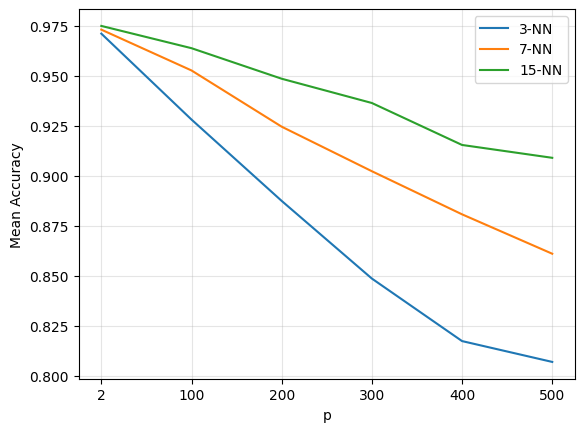

In [7]:
for key in res:
    plt.plot(res[key])

labels = [str(x) for x in dlist]
x_axis = range(len(dlist))
plt.xticks(x_axis, labels)

plt.grid(alpha=0.33)
plt.legend(['3-NN','7-NN','15-NN'])
plt.ylabel('Mean Accuracy')
plt.xlabel('p')
plt.show()   

---